# Kepler Datasets - Classification

**Intro to this project**

Based on the collected Kepler disposition data, I want to build a classification system that could help predict new exoplanets and also to analyze the critical factors affecting the exoplanet dispositions.

**Data**

9564 rows with 50 columns 
- Missing Values
-Normalization/Standardization


**Model**

- Logistic regression
- SVM
- Random forest

Random forest performs the best concerning cross-validated prediction accuracy.

**Further Improvement**

1. Try to apply some undersampling\oversampling\SMOTE methods to make the data set more balanced, which may help increase prediction accuracy
1. Try to apply dimensionality reduction method such as PCA, which may help to remove redundant variables
2. Try other ensemble models such as bagging or boosting



# Load the raw data

In [21]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import imblearn
import seaborn as sns

In [6]:
raw_df = pd.read_csv("../Resources/cumulative.csv")
raw_df

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [8]:
raw_df.columns

Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [13]:
raw_df['koi_disposition'].value_counts()

FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: koi_disposition, dtype: int64

In [28]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

According to the dataframe info as shown above, several redundant columns should be removed.

In [29]:
df = raw_df.drop(columns = ['rowid', 'kepid', 'kepoi_name', 'kepler_name','koi_pdisposition', 'koi_score', 'koi_teq_err1', 'koi_teq_err2','koi_tce_delivname'])

In [32]:
df.isna().sum()

koi_disposition        0
koi_fpflag_nt          0
koi_fpflag_ss          0
koi_fpflag_co          0
koi_fpflag_ec          0
koi_period             0
koi_period_err1      454
koi_period_err2      454
koi_time0bk            0
koi_time0bk_err1     454
koi_time0bk_err2     454
koi_impact           363
koi_impact_err1      454
koi_impact_err2      454
koi_duration           0
koi_duration_err1    454
koi_duration_err2    454
koi_depth            363
koi_depth_err1       454
koi_depth_err2       454
koi_prad             363
koi_prad_err1        363
koi_prad_err2        363
koi_teq              363
koi_insol            321
koi_insol_err1       321
koi_insol_err2       321
koi_model_snr        363
koi_tce_plnt_num     346
koi_steff            363
koi_steff_err1       468
koi_steff_err2       483
koi_slogg            363
koi_slogg_err1       468
koi_slogg_err2       468
koi_srad             363
koi_srad_err1        468
koi_srad_err2        468
ra                     0
dec                    0


In [37]:
df = df.dropna(how='any')
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,FALSE POSITIVE,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [38]:
# df.to_csv('../Resources/cleaned_data1.csv',index = False)

In [39]:
df.describe()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8.744000e+03,8.744000e+03,8744.000000,8744.000000,8744.000000,...,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000
mean,0.157136,0.241194,0.201167,0.125114,56.080618,1.839523e-03,-1.839523e-03,164.563271,0.009300,-0.009300,...,-161.354758,4.310223,0.120733,-0.140411,1.704566,0.352884,-0.379933,292.075061,43.828259,14.273969
std,0.363950,0.427832,0.400895,0.330867,117.385280,7.276504e-03,7.276504e-03,66.476457,0.021662,0.021662,...,72.986448,0.431557,0.132813,0.082936,5.682429,0.906364,1.810943,4.772918,3.599786,1.343509
min,0.000000,0.000000,0.000000,0.000000,0.259820,1.100000e-08,-1.568000e-01,120.515914,0.000009,-0.569000,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-103.825000,279.852720,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,2.667824,5.286750e-06,-2.456250e-04,132.729408,0.001200,-0.010000,...,-197.000000,4.215750,0.043000,-0.195000,0.826000,0.125750,-0.247000,288.670237,40.805911,13.474000
50%,0.000000,0.000000,0.000000,0.000000,8.970985,3.323000e-05,-3.323000e-05,136.910235,0.004020,-0.004020,...,-159.000000,4.439000,0.070000,-0.127000,0.997000,0.246000,-0.111000,292.285005,43.703989,14.534000
75%,0.000000,0.000000,0.000000,0.000000,34.190033,2.456250e-04,-5.286750e-06,169.975942,0.010000,-0.001200,...,-112.000000,4.544000,0.149000,-0.087000,1.346250,0.356000,-0.069000,295.900510,46.722135,15.318250
max,1.000000,1.000000,1.000000,1.000000,1071.232624,1.568000e-01,-1.100000e-08,1472.522306,0.569000,-0.000009,...,0.000000,5.364000,1.472000,0.000000,180.013000,33.091000,0.000000,301.720760,52.336010,19.065000


In [40]:
corrMatrix = df.corr()
corrMatrix.sort_values('koi_fpflag_nt')

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
koi_duration_err2,-0.344972,0.183335,0.002113,-0.033183,-0.382431,-0.534752,0.534752,-0.237258,-0.528747,0.528747,...,0.076692,0.051151,-0.027428,0.129590,-0.029942,-0.059421,0.036477,-0.011728,0.023621,0.056563
koi_period_err2,-0.336933,0.129878,0.086518,0.077932,-0.659737,-1.000000,1.000000,-0.452101,-0.461780,0.461780,...,0.052574,0.013755,-0.005830,0.141820,-0.011520,-0.028745,0.007105,0.017733,-0.003094,0.029448
koi_time0bk_err2,-0.239721,0.169382,0.026561,-0.014716,-0.269031,-0.461780,0.461780,-0.161391,-1.000000,1.000000,...,0.058054,0.040166,-0.034612,0.117075,-0.037654,-0.052977,0.034968,0.002847,0.006612,0.031727
koi_fpflag_ss,-0.238290,1.000000,0.143202,0.093028,-0.152028,-0.129878,0.129878,-0.111137,-0.169382,0.169382,...,-0.180833,-0.058389,0.118495,-0.064498,0.041177,0.044623,-0.043693,0.086233,-0.045010,-0.011513
koi_steff_err2,-0.147610,-0.180833,-0.117778,-0.082668,-0.032950,-0.052574,0.052574,-0.023927,-0.058054,0.058054,...,1.000000,0.076015,-0.152857,0.394276,0.017691,-0.054497,0.029944,-0.131914,0.009845,0.061717
koi_slogg_err2,-0.144440,-0.064498,-0.060940,-0.049027,-0.165172,-0.141820,0.141820,-0.107981,-0.117075,0.117075,...,0.394276,0.036501,-0.244192,1.000000,0.040743,-0.163898,0.006238,-0.076472,-0.015317,-0.013005
koi_slogg,-0.129941,-0.058389,-0.009021,0.000025,-0.061407,-0.013755,0.013755,-0.011739,-0.040166,0.040166,...,0.076015,1.000000,-0.482933,0.036501,-0.652216,-0.618151,0.578639,-0.080481,0.052649,0.482994
koi_kepmag,-0.095153,-0.011513,0.066857,0.041891,-0.051699,-0.029448,0.029448,0.009348,-0.031727,0.031727,...,0.061717,0.482994,-0.330263,-0.013005,-0.184984,-0.203990,0.179134,0.004363,0.017862,1.000000
koi_model_snr,-0.073763,0.434743,-0.130673,-0.092673,-0.072307,-0.079569,0.079569,-0.056989,-0.131284,0.131284,...,-0.120154,-0.046949,0.120098,-0.031731,-0.009765,0.003044,-0.004689,0.038305,-0.001760,-0.123370
koi_srad_err2,-0.060222,-0.043693,-0.018112,-0.015670,-0.010689,-0.007105,0.007105,0.005151,-0.034968,0.034968,...,0.029944,0.578639,-0.201173,0.006238,-0.857725,-0.695456,1.000000,-0.054012,0.029351,0.179134


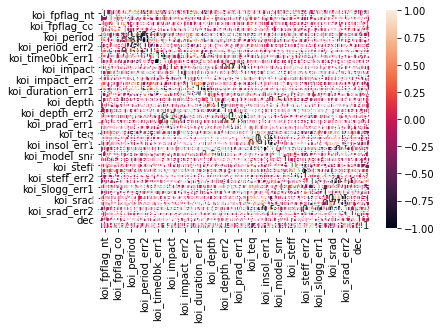

In [41]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [42]:
df['koi_disposition'].value_counts()

FALSE POSITIVE    4358
CONFIRMED         2272
CANDIDATE         2114
Name: koi_disposition, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
#Oversampling the data

y_raw = df['koi_disposition']
X_raw = df.drop(columns='koi_disposition')
feature_names = X_raw.columns
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(X_raw, y_raw)
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X)
df_oversampler

In [ ]:
sns.countplot(y)